## Example of end-to-end workflow

In [1]:
from src.common.alternate_runable_code import AlternateRunableCode
from src.common.extract_runable_code import ExtractRunableCode
from src.common.llm_helper import LLMHelper
from src.common.parse_lib_docs import ParseLibDocs
from src.common.query_timer import QueryTimer

In [8]:
# initialize modules
llm_helper = LLMHelper('connection_string')
lib_parser = ParseLibDocs('numpy', 'https://numpy.org/doc/stable/reference')

# parse the lib docs and get a list of functions in the library
function_list = lib_parser.parse()

# Get the sample query
code_extractor = ExtractRunableCode(function_list[1], 'numpy', llm_helper)
query = code_extractor.extract_code()

alternate_query_extractor = AlternateRunableCode(llm_helper)
alternate_query = alternate_query_extractor.get_alternate_runable_code(query)

# Get the query timer object
query_timer = QueryTimer()
original_time = query_timer.time_function(query)
alterante_time = query_timer.time_function(alternate_query)

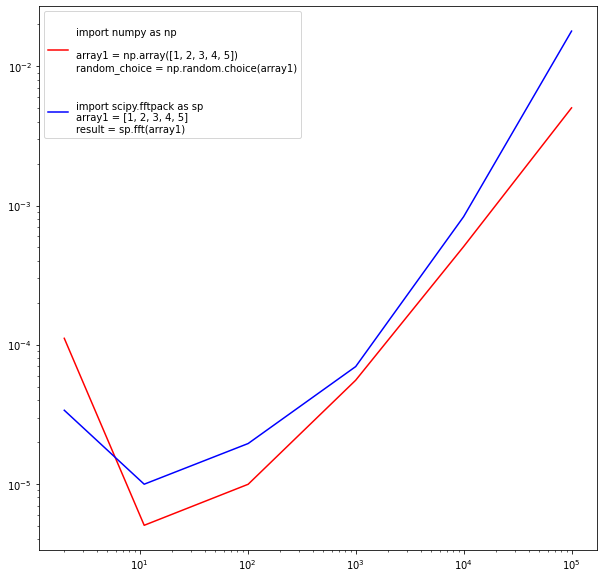

In [3]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 10))
# plot the keys and values on a log scale for original and alternate values
plt.plot(original_time.keys(), original_time.values(), 'r-', label=query)
plt.plot(alterante_time.keys(), alterante_time.values(), 'b-', label=alternate_query)

plt.xscale('log')
plt.yscale('log')
plt.legend()

In [4]:
original_time
# alterante_time

{2: 0.00011126029999999987,
 11: 5.0502000000001156e-06,
 101: 9.95210000000002e-06,
 1001: 5.561879999999997e-05,
 10001: 0.0005067442999999998,
 100001: 0.0050286704}

In [5]:
alterante_time

{2: 3.3845799999999926e-05,
 11: 9.964000000000085e-06,
 101: 1.952510000000007e-05,
 1001: 6.970770000000038e-05,
 10001: 0.0008311076000000011,
 100001: 0.0178966472}